In [419]:
# Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [420]:
# Read the csv files
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")
city_data.head()
x = city_data.loc[city_data['city'] == 'Port James']
x

,city,driver_count,type
84,Port James,15,Suburban
100,Port James,3,Suburban


In [421]:
# Check for NAN values and replace with 0
city_data.fillna(value=0)
city_data.head()
#len(city_data)


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


### MERGE DUPLICATE ROWS FOR SAME CITY

In [422]:
city_data_grouped = city_data.groupby(['city', 'type'])
city_data_unique = pd.DataFrame(city_data_grouped.sum())
#city_data_unique.head()
city_data_unique = city_data_unique.reset_index().set_index('city')
city_data_unique.head()
# x1 = city_data_unique.loc[['Port James']]
# len(x1)


,type,driver_count
city,,
Alvarezhaven,Urban,21
Alyssaberg,Urban,67
Anitamouth,Suburban,16
Antoniomouth,Urban,21
Aprilchester,Urban,49


In [423]:
ride_data.fillna(value=0)
ride_data.head()
y = ride_data.loc[ride_data['city'] == 'Port James']
# y['fare'].count()
#y['fare'].mean()
len(y)
ride_data = ride_data.set_index('city')
ride_data.head()

,date,fare,ride_id
city,,,
Sarabury,2016-01-16 13:49:27,38.35,5403689035038
South Roy,2016-01-02 18:42:34,17.49,4036272335942
Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
Spencertown,2016-07-31 14:53:22,6.87,2242596575892
Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [424]:
# join both the DFs into one
cityride_df = city_data_unique.join(ride_data)
cityride_df = cityride_df[["type", "driver_count", "ride_id", "fare"]]
cityride_df.head()
# len(cityride_df)

#h = cityride_df.loc[['Port James']]
# w =h['ride_id'].unique()
i =  cityride_df.loc[cityride_df['ride_id'] == 2259499336994]
# len(w)
#len(h)
i


,type,driver_count,ride_id,fare
city,,,,
Port James,Suburban,18,2259499336994,15.77


# PYBER ANALYSIS
------

### GET KEY VARIABLES

In [425]:
# Groupby on city
cityride_grouped_df = cityride_df.groupby(["city"])

# Average fare per city by using groupby object
average_fare = cityride_grouped_df["fare"].mean()

# Total number of rides per city
total_rides_city = cityride_grouped_df["ride_id"].count()

# Total number of driver per city
driver_count_df = city_data_unique[["driver_count"]]

# City Type (Urban, Suburban, Rural)
city_type_df= city_data_unique[["type"]]

  
#average_fare.head()
#total_rides_city
#final_df
# driver_count_grouped_df.head()
#city_type_grouped_df.head(100)
city_type_df.loc[['Port James']]

,type
city,
Port James,Suburban


### RESULTING DATAFRAME



In [426]:
results_df = pd.DataFrame({"Average Fare":average_fare, "Rides Per City":total_rides_city})
results_df = results_df.join([city_type_df, driver_count_df])

# Format the Average Fare column
#results_df["Average Fare"] = results_df["Average Fare"]#.map("${0:,.2f}".format)
results_df['Average Fare'] =results_df['Average Fare'].astype(int)
results_df.head()
#len(results_df)
#results_df.loc[['Port James']]

,Average Fare,Rides Per City,type,driver_count
city,,,,
Alvarezhaven,23,31,Urban,21
Alyssaberg,20,26,Urban,67
Anitamouth,37,9,Suburban,16
Antoniomouth,23,22,Urban,21
Aprilchester,21,19,Urban,49


In [427]:
#### TEST
z = results_df.loc[["Port James"]]
z

,Average Fare,Rides Per City,type,driver_count
city,,,,
Port James,31,32,Suburban,18


#### TEST DATAFRAME RESULTS FOR DUPLICATE VALUES:

In [428]:
if z['type'].value_counts().tolist()[0] == 1:
    print("Dataframe results Ok!")
else:
    print("Warning: Duplicate Values Present!")

Dataframe results Ok!


In [429]:
# Get total fare per city
total_fare_city = cityride_grouped_df["fare"].sum()

# % of Total Fares by City Type
results_df['Percent Total Fare'] = (total_fare_city/total_fare_city.sum()*100).map("{0:,.2f}%".format)

# % of Total Rides by City Type
results_df["Percent Total Rides"] = (results_df['Rides Per City']/results_df['Rides Per City'].sum()*100).map("{0:,.2f}%".format)

# % of Total Drivers by City Type
results_df['Percent Total Drivers'] = (results_df['driver_count']/results_df['driver_count'].sum()*100).map("{0:,.2f}%".format)

# Rename the some columns
results_df = results_df.rename(columns={'driver_count':'Driver Counts', "type":"City Type"})

results_df.head()


,Average Fare,Rides Per City,City Type,Driver Counts,Percent Total Fare,Percent Total Rides,Percent Total Drivers
city,,,,,,,
Alvarezhaven,23,31,Urban,21,1.17%,1.31%,0.63%
Alyssaberg,20,26,Urban,67,0.84%,1.09%,2.00%
Anitamouth,37,9,Suburban,16,0.53%,0.38%,0.48%
Antoniomouth,23,22,Urban,21,0.82%,0.93%,0.63%
Aprilchester,21,19,Urban,49,0.66%,0.80%,1.46%


In [430]:
z = results_df.loc[["East Douglas"]]
z
total_fare_city.sum()

63651.310000000005

In [431]:
colors = ['gold', 'lightskyblue', 'lightcoral']
legends = ['Urban', 'Suburban', 'Rural']
types = results_df['City Type']

plt.scatter(x=results_df['Rides Per City'], y=results_df['Average Fare'], s=results_df['Driver Counts'])
for types in legends:
    plt.scatter([], [], [], alpha=0.5,
                label=str(types), color=colors[legends])
plt.grid()    
plt.xlim(0,results_df['Rides Per City'].max())
plt.ylim(0,results_df['Average Fare'].max()+15)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Average Fare (per city)")
plt.ylabel("Total Rides (per city)")

plt.legend(scatterpoints=1, frameon=False, labelspacing=0, title='City Types')

plt.yticks(np.arange(0, results_df['Average Fare'].max()+15, 5.0))





plt.show()

TypeError: list indices must be integers or slices, not list

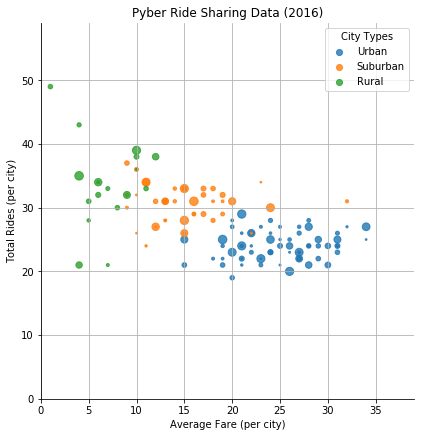

In [440]:
sns.lmplot(x='Rides Per City', y='Average Fare', data=results_df, fit_reg=False, hue='City Type', 
           legend=False, size=6, scatter_kws={"s":results_df["Driver Counts"]})
plt.grid()

plt.xlim(0,results_df['Rides Per City'].max()+5)
plt.ylim(0,results_df['Average Fare'].max()+10)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Average Fare (per city)")
plt.ylabel("Total Rides (per city)")


plt.legend(loc='upper right', title='City Types')
plt.show(2)